# Customer Lifetime Value

## Section 1: Project Definition

In marketing, "Acquiring a new customer can cost five times more than retaining an existing customer". Customer Lifetime Value (CLV or LV) is one of index to define which customer is value to focus and retain. One of the simple and effective methodologies to predict CLV is RFM (R — Recency, F — Frequency, M — Monetary)

In [4]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as pn

In [5]:
#Load data
tk = pd.read_excel (r'C:\Users\Admin\Documents\GMS\Py\Ticket1000.xlsx')

In [6]:
tk_sub = tk[["card_number","tk_issdate", "fare_total"]]

In [7]:
tk = tk_sub

In [8]:
tk

,card_number,tk_issdate,fare_total
0,93166682.0,2020-09-27,1290000.0
1,9200251591.0,2020-07-20,1470000.0
2,9101332968.0,2021-12-21,1495000.0
3,9200335332.0,2021-03-11,9581000.0
4,98319512.0,2020-08-25,1730000.0
...,...,...,...
26997,9000076843.0,2020-12-30,5980000.0
26998,94183123.0,2020-08-19,5980000.0
26999,99234652.0,2020-09-10,5980000.0
27000,90121878.0,2020-12-23,5980000.0


## Section 2: Analysis

### Data Exploration

Check the data of the dataset as well as the description of the fields

In [9]:
tk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27002 entries, 0 to 27001
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   card_number  27002 non-null  object        
 1   tk_issdate   27002 non-null  datetime64[ns]
 2   fare_total   27002 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 633.0+ KB


In [10]:
tk.describe()

,fare_total
count,2.700200e+04
mean,2.971616e+06
std,3.354804e+06
min,0.000000e+00
25%,1.030000e+06
50%,2.038000e+06
75%,3.670000e+06
max,1.255890e+08


In [11]:
tk[tk['fare_total'] == tk['fare_total'].max()]

,card_number,tk_issdate,fare_total
2949,98351636.0,2022-01-21,125589000.0


In [12]:
tk = tk[tk['fare_total'] > 100000]

In [13]:
tk[tk['fare_total'] == tk['fare_total'].min()]

,card_number,tk_issdate,fare_total
1031,90509434.0,2022-03-10,106000.0
7070,90247939.0,2022-01-10,106000.0


### Data Visualization

Visual representation of some fields such as ticket transaction time

<AxesSubplot:xlabel='tk_issdate'>

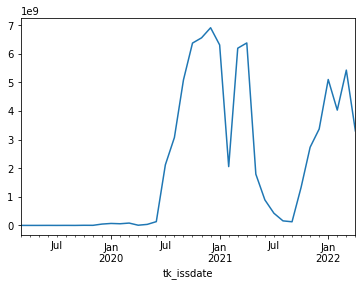

In [14]:
tk.reset_index().set_index("tk_issdate")['fare_total'].resample(rule ="MS").sum().plot()

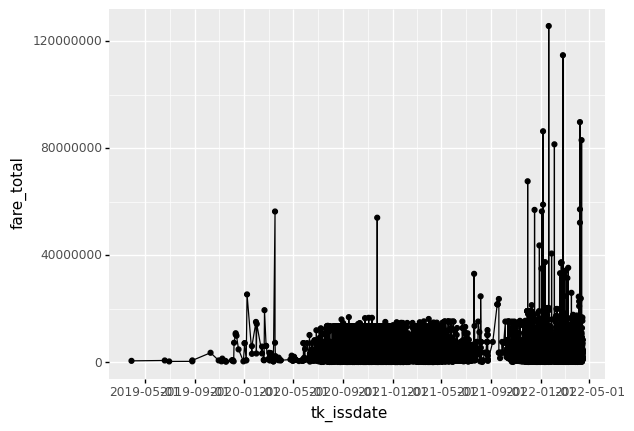

<ggplot: (170346991469)>

In [15]:
pn.ggplot(tk, pn.aes(x='tk_issdate', y='fare_total')) + pn.geom_point() + pn.geom_line()

In [16]:
tk["tk_issdate"].astype(str).str[:4].unique()

array(['2020', '2021', '2022', '2019'], dtype=object)

In [17]:
tk["tk_issdate"].min()

Timestamp('2019-03-29 00:00:00')

In [18]:
tk["tk_issdate"].max()

Timestamp('2022-04-14 00:00:00')

In [19]:
tk['card_number'].nunique()

933

In [20]:
#Check mismatch in card number
tk[tk['card_number'].astype(str).str.match(r'\d*').astype(bool) == False]

,card_number,tk_issdate,fare_total


## Section 3: Methodology

### Data Preprocessing

Split dataset into train and test dataset. Calculate to RFM metric

In [21]:
tk_train = tk[tk["tk_issdate"].astype(str).str[:4] != '2022']

In [22]:
tk_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20624 entries, 0 to 27001
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   card_number  20624 non-null  object        
 1   tk_issdate   20624 non-null  datetime64[ns]
 2   fare_total   20624 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 644.5+ KB


In [23]:
tk_target = tk

In [24]:
tk_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25713 entries, 0 to 27001
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   card_number  25713 non-null  object        
 1   tk_issdate   25713 non-null  datetime64[ns]
 2   fare_total   25713 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 803.5+ KB


In [25]:
max_date = tk_train["tk_issdate"].max()

In [26]:
max_date

Timestamp('2021-12-31 00:00:00')

In [27]:
statis_recency_ft = tk_train[["card_number", "tk_issdate"]].groupby("card_number").apply(lambda x: (x["tk_issdate"].max() - x["tk_issdate"].min()) / pd.to_timedelta(1,"day")).to_frame().set_axis(["statis_recency"], axis = 1)

In [28]:
statis_recency_ft

,statis_recency
card_number,
9.000581e+07,442.0
9.000934e+07,292.0
9.002193e+07,514.0
9.002426e+07,472.0
9.002524e+07,421.0
...,...
1.150176e+11,189.0
1.168181e+11,84.0
1.800071e+11,239.0


In [29]:
frequency_ft = tk_train[["card_number", "tk_issdate"]].groupby("card_number").count().set_axis(["frequency"], axis = 1)

In [30]:
frequency_ft

,frequency
card_number,
9.000581e+07,8
9.000934e+07,22
9.002193e+07,36
9.002426e+07,28
9.002524e+07,13
...,...
1.150176e+11,13
1.168181e+11,4
1.800071e+11,2


In [31]:
monetary_ft = tk_train[["card_number", "fare_total"]].groupby("card_number").sum().set_axis(["monetary"], axis = 1)

In [32]:
marketing_recency_ft = tk_train[["card_number", "tk_issdate"]].groupby("card_number").apply(lambda x: (max_date - x["tk_issdate"].max()) / pd.to_timedelta(1,"day")).to_frame().set_axis(["mkt_recency"], axis = 1)

In [33]:
marketing_recency_ft

,mkt_recency
card_number,
9.000581e+07,2.0
9.000934e+07,247.0
9.002193e+07,13.0
9.002426e+07,0.0
9.002524e+07,16.0
...,...
1.150176e+11,235.0
1.168181e+11,350.0
1.800071e+11,21.0


In [34]:
features = pd.concat((statis_recency_ft, frequency_ft, monetary_ft, marketing_recency_ft), axis = 1).merge(tk_target, left_index = True, right_index = True, how = "left").fillna(0)

In [35]:
features = features.drop(columns=['fare_total', 'card_number', 'tk_issdate'])

In [36]:
features

,statis_recency,frequency,monetary,mkt_recency
card_number,,,,
9.000581e+07,442.0,8,16693000.0,2.0
9.000934e+07,292.0,22,78021000.0,247.0
9.002193e+07,514.0,36,69822000.0,13.0
9.002426e+07,472.0,28,132220000.0,0.0
9.002524e+07,421.0,13,15045000.0,16.0
...,...,...,...,...
1.150176e+11,189.0,13,37701000.0,235.0
1.168181e+11,84.0,4,10943000.0,350.0
1.800071e+11,239.0,2,6832000.0,21.0


In [37]:
features["monetary_avg"] = features["monetary"]/features["frequency"]

In [38]:
customer_age_ft = tk_train[["card_number", "tk_issdate"]].groupby("card_number").apply(lambda x: (max_date - x["tk_issdate"].min()) / pd.to_timedelta(1,"day")).to_frame().set_axis(["mkt_recency"], axis = 1)

In [39]:
features["customer_age"]=customer_age_ft["mkt_recency"]

In [40]:
tk_target

,card_number,tk_issdate,fare_total
0,93166682.0,2020-09-27,1290000.0
1,9200251591.0,2020-07-20,1470000.0
2,9101332968.0,2021-12-21,1495000.0
3,9200335332.0,2021-03-11,9581000.0
4,98319512.0,2020-08-25,1730000.0
...,...,...,...
26997,9000076843.0,2020-12-30,5980000.0
26998,94183123.0,2020-08-19,5980000.0
26999,99234652.0,2020-09-10,5980000.0
27000,90121878.0,2020-12-23,5980000.0


In [41]:
target = tk_target.groupby("card_number").sum().rename(columns={'fare_total':'CLV','card_number' : 'card_number'}).assign(spend_flag = 1)

In [42]:
features = features.merge(target, left_index = True, right_index = True, how = "left").fillna(0)

In [43]:
#ft = features_new.merge(features_2, left_index = True, right_index = True, how = "left")

In [44]:
#ft

In [45]:
#ft["st"] = ft["monetary"] + ft["predicted_monetary"]*ft["predicted_purchases_100"]

## Implementation & Refinement

#### KMeans Clustering

Check the number of cluster of each metric in RFM by Elbow method

In [46]:
from sklearn.cluster import KMeans

In [47]:
fr = features[["frequency"]]

C:\Users\Admin\AppData\Local\Temp/ipykernel_10588/3497397517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Local\Temp/ipykernel_10588/3497397517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Local\Temp/ipykernel_10588/3497397517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

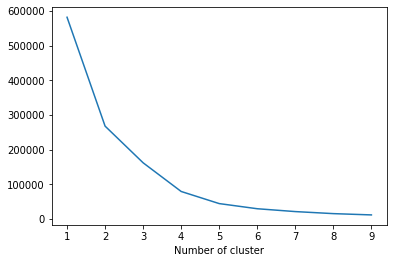

In [48]:
sse ={}
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(fr)
    fr["clusters"]=kmeans.labels_
    sse[k]=kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

C:\Users\Admin\AppData\Local\Temp/ipykernel_10588/3729501365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Local\Temp/ipykernel_10588/3729501365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Local\Temp/ipykernel_10588/3729501365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

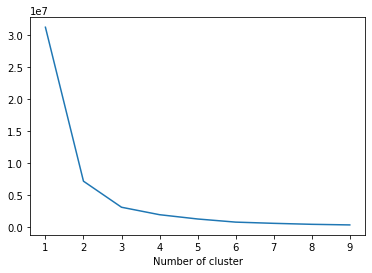

In [49]:
sr = features[["statis_recency"]]
ss1 ={}
for k in range(1,10):
    kmeans1 = KMeans(n_clusters = k, max_iter = 1000).fit(sr)
    fr["clusters"]=kmeans1.labels_
    ss1[k]=kmeans1.inertia_
plt.figure()
plt.plot(list(ss1.keys()), list(ss1.values()))
plt.xlabel("Number of cluster")
plt.show()

C:\Users\Admin\AppData\Local\Temp/ipykernel_10588/2611638542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Local\Temp/ipykernel_10588/2611638542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Local\Temp/ipykernel_10588/2611638542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

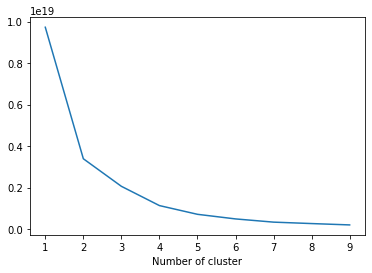

In [50]:
mn = features[["monetary"]]
ss2 ={}
for k in range(1,10):
    kmeans2 = KMeans(n_clusters = k, max_iter = 10000).fit(mn)
    fr["clusters"]=kmeans2.labels_
    ss2[k]=kmeans2.inertia_
plt.figure()
plt.plot(list(ss2.keys()), list(ss2.values()))
plt.xlabel("Number of cluster")
plt.show()

C:\Users\Admin\AppData\Local\Temp/ipykernel_10588/2898741985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Local\Temp/ipykernel_10588/2898741985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Local\Temp/ipykernel_10588/2898741985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

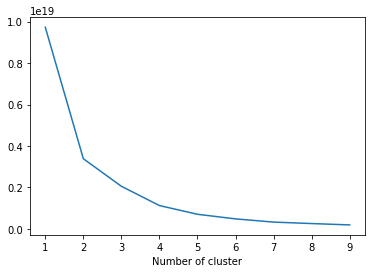

In [51]:
mr = features[["mkt_recency"]]
ss3 ={}
for k in range(1,10):
    kmeans3 = KMeans(n_clusters = k, max_iter = 10000).fit(mn)
    fr["clusters"]=kmeans3.labels_
    ss3[k]=kmeans3.inertia_
plt.figure()
plt.plot(list(ss3.keys()), list(ss3.values()))
plt.xlabel("Number of cluster")
plt.show()

In [52]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

#Dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(sr)
  labels = kmeans.labels_
  sil.append(silhouette_score(sr, labels, metric = 'euclidean'))

Check again by Silhouette

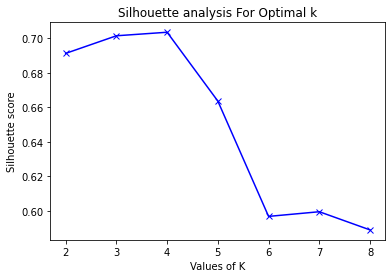

In [53]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 #Initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(sr)
 cluster_labels = kmeans.labels_
 
 #Silhouette score
 silhouette_avg.append(silhouette_score(sr, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

From the cluster above, create model and fit data into model

In [54]:
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(fr)

KMeans(n_clusters=2)

In [55]:
kmeans1.cluster_centers_

array([[15.46699875,  3.32503113],
       [71.33913043,  4.23478261]])

In [56]:
features["fr_labels"] = kmeans1.labels_

In [57]:
features

,statis_recency,frequency,monetary,mkt_recency,monetary_avg,customer_age,CLV,spend_flag,fr_labels
card_number,,,,,,,,,
9.000581e+07,442.0,8,16693000.0,2.0,2.086625e+06,444.0,28740000.0,1,0
9.000934e+07,292.0,22,78021000.0,247.0,3.546409e+06,539.0,84742000.0,1,0
9.002193e+07,514.0,36,69822000.0,13.0,1.939500e+06,527.0,107897000.0,1,0
9.002426e+07,472.0,28,132220000.0,0.0,4.722143e+06,472.0,150697000.0,1,0
9.002524e+07,421.0,13,15045000.0,16.0,1.157308e+06,437.0,19843000.0,1,0
...,...,...,...,...,...,...,...,...,...
1.150176e+11,189.0,13,37701000.0,235.0,2.900077e+06,424.0,43699000.0,1,0
1.168181e+11,84.0,4,10943000.0,350.0,2.735750e+06,434.0,14589000.0,1,0
1.800071e+11,239.0,2,6832000.0,21.0,3.416000e+06,260.0,31957000.0,1,0


<AxesSubplot:xlabel='frequency'>

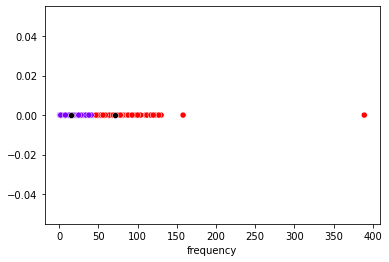

In [58]:
#Check the distribution of data in cluster and center of each
sns.scatterplot(data = features, x="frequency", y=0, c= kmeans1.labels_, cmap= 'rainbow' )

sns.scatterplot(x=kmeans1.cluster_centers_[:, 0], y = 0, c=['black'])

In [59]:
#Check center
kmeans1.cluster_centers_

array([[15.46699875,  3.32503113],
       [71.33913043,  4.23478261]])

In [60]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(sr)

KMeans(n_clusters=4)

In [61]:
kmeans2.cluster_centers_

array([[484.05348837],
       [ 40.62658228],
       [241.52272727],
       [720.09090909]])

In [62]:
features["sr_cluster"] = kmeans2.labels_

In [63]:
features["sr_labels"] = features["sr_cluster"]

In [64]:
features

,statis_recency,frequency,monetary,mkt_recency,monetary_avg,customer_age,CLV,spend_flag,fr_labels,sr_cluster,sr_labels
card_number,,,,,,,,,,,
9.000581e+07,442.0,8,16693000.0,2.0,2.086625e+06,444.0,28740000.0,1,0,0,0
9.000934e+07,292.0,22,78021000.0,247.0,3.546409e+06,539.0,84742000.0,1,0,2,2
9.002193e+07,514.0,36,69822000.0,13.0,1.939500e+06,527.0,107897000.0,1,0,0,0
9.002426e+07,472.0,28,132220000.0,0.0,4.722143e+06,472.0,150697000.0,1,0,0,0
9.002524e+07,421.0,13,15045000.0,16.0,1.157308e+06,437.0,19843000.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1.150176e+11,189.0,13,37701000.0,235.0,2.900077e+06,424.0,43699000.0,1,0,2,2
1.168181e+11,84.0,4,10943000.0,350.0,2.735750e+06,434.0,14589000.0,1,0,1,1
1.800071e+11,239.0,2,6832000.0,21.0,3.416000e+06,260.0,31957000.0,1,0,2,2


In [65]:
#Change labels into point
features.loc[features['sr_labels'] == 0, 'sr_labels'] = 5
features.loc[features['sr_labels'] == 1, 'sr_labels'] = 6
features.loc[features['sr_labels'] == 2, 'sr_labels'] = 7
features.loc[features['sr_labels'] == 3, 'sr_labels'] = 8

features.loc[features['sr_labels'] == 5, 'sr_labels'] = 0
features.loc[features['sr_labels'] == 6, 'sr_labels'] = 3
features.loc[features['sr_labels'] == 7, 'sr_labels'] = 2
features.loc[features['sr_labels'] == 8, 'sr_labels'] = 1

In [66]:
features

,statis_recency,frequency,monetary,mkt_recency,monetary_avg,customer_age,CLV,spend_flag,fr_labels,sr_cluster,sr_labels
card_number,,,,,,,,,,,
9.000581e+07,442.0,8,16693000.0,2.0,2.086625e+06,444.0,28740000.0,1,0,0,0
9.000934e+07,292.0,22,78021000.0,247.0,3.546409e+06,539.0,84742000.0,1,0,2,2
9.002193e+07,514.0,36,69822000.0,13.0,1.939500e+06,527.0,107897000.0,1,0,0,0
9.002426e+07,472.0,28,132220000.0,0.0,4.722143e+06,472.0,150697000.0,1,0,0,0
9.002524e+07,421.0,13,15045000.0,16.0,1.157308e+06,437.0,19843000.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1.150176e+11,189.0,13,37701000.0,235.0,2.900077e+06,424.0,43699000.0,1,0,2,2
1.168181e+11,84.0,4,10943000.0,350.0,2.735750e+06,434.0,14589000.0,1,0,1,3
1.800071e+11,239.0,2,6832000.0,21.0,3.416000e+06,260.0,31957000.0,1,0,2,2


In [67]:
kmeans3 = KMeans(n_clusters=2)
kmeans3.fit(mr)

KMeans(n_clusters=2)

In [68]:
kmeans3.cluster_centers_

array([[ 17.82377919],
       [294.61073826]])

In [69]:
kmeans4 = KMeans(n_clusters=2)
kmeans4.fit(mn)

KMeans(n_clusters=2)

In [70]:
kmeans4.cluster_centers_

array([[4.38660472e+07],
       [3.54992701e+08]])

In [71]:
features["mr_cluster"] = kmeans3.labels_

In [72]:
features["mr_labels"] = features["mr_cluster"]

In [73]:
features

,statis_recency,frequency,monetary,mkt_recency,monetary_avg,customer_age,CLV,spend_flag,fr_labels,sr_cluster,sr_labels,mr_cluster,mr_labels
card_number,,,,,,,,,,,,,
9.000581e+07,442.0,8,16693000.0,2.0,2.086625e+06,444.0,28740000.0,1,0,0,0,0,0
9.000934e+07,292.0,22,78021000.0,247.0,3.546409e+06,539.0,84742000.0,1,0,2,2,1,1
9.002193e+07,514.0,36,69822000.0,13.0,1.939500e+06,527.0,107897000.0,1,0,0,0,0,0
9.002426e+07,472.0,28,132220000.0,0.0,4.722143e+06,472.0,150697000.0,1,0,0,0,0,0
9.002524e+07,421.0,13,15045000.0,16.0,1.157308e+06,437.0,19843000.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.150176e+11,189.0,13,37701000.0,235.0,2.900077e+06,424.0,43699000.0,1,0,2,2,1,1
1.168181e+11,84.0,4,10943000.0,350.0,2.735750e+06,434.0,14589000.0,1,0,1,3,1,1
1.800071e+11,239.0,2,6832000.0,21.0,3.416000e+06,260.0,31957000.0,1,0,2,2,0,0


In [74]:
features["mn_cluster"] = kmeans4.labels_

In [75]:
features["mn_labels"] = features["mn_cluster"]

In [76]:
features = features.drop(columns=['sr_cluster'])

Calculate total score from cluster

In [77]:
features["rfm_scores"] = features["fr_labels"] + features["mn_labels"] + features["sr_labels"]

In [78]:
features["mkt_rfm_scores"] = features["fr_labels"] + features["mn_labels"] + features["mr_labels"]

In [79]:
features

,statis_recency,frequency,monetary,mkt_recency,monetary_avg,customer_age,CLV,spend_flag,fr_labels,sr_labels,mr_cluster,mr_labels,mn_cluster,mn_labels,rfm_scores,mkt_rfm_scores
card_number,,,,,,,,,,,,,,,,
9.000581e+07,442.0,8,16693000.0,2.0,2.086625e+06,444.0,28740000.0,1,0,0,0,0,0,0,0,0
9.000934e+07,292.0,22,78021000.0,247.0,3.546409e+06,539.0,84742000.0,1,0,2,1,1,0,0,2,1
9.002193e+07,514.0,36,69822000.0,13.0,1.939500e+06,527.0,107897000.0,1,0,0,0,0,0,0,0,0
9.002426e+07,472.0,28,132220000.0,0.0,4.722143e+06,472.0,150697000.0,1,0,0,0,0,0,0,0,0
9.002524e+07,421.0,13,15045000.0,16.0,1.157308e+06,437.0,19843000.0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.150176e+11,189.0,13,37701000.0,235.0,2.900077e+06,424.0,43699000.0,1,0,2,1,1,0,0,2,1
1.168181e+11,84.0,4,10943000.0,350.0,2.735750e+06,434.0,14589000.0,1,0,3,1,1,0,0,3,1
1.800071e+11,239.0,2,6832000.0,21.0,3.416000e+06,260.0,31957000.0,1,0,2,0,0,0,0,2,0


In [80]:
#Devide/Segment customer by score of RFM
features[["mkt_rfm_scores"]].sort_values(by='mkt_rfm_scores')

,mkt_rfm_scores
card_number,
9.000581e+07,0
9.780592e+07,0
9.777774e+07,0
9.774036e+07,0
9.753941e+07,0
...,...
9.912134e+07,2
9.404510e+07,2
9.405724e+07,2


#### Probabilistic models

##### BG/NBD model

Predict the future purchase of customer

In [81]:
from lifetimes import BetaGeoFitter

In [82]:
# bgf1 = BetaGeoFitter(penalizer_coef=0.0)
# bgf1.fit(features['frequency'], features['mkt_recency'], features['customer_age'])
# print(bgf1)
# """
# <lifetimes.BetaGeoFitter: fitted with 2357 subjects, a: 0.79, alpha: 4.41, b: 2.43,
# ˓→r: 0.24>
# """
# bgf1.summary

In [83]:
features

,statis_recency,frequency,monetary,mkt_recency,monetary_avg,customer_age,CLV,spend_flag,fr_labels,sr_labels,mr_cluster,mr_labels,mn_cluster,mn_labels,rfm_scores,mkt_rfm_scores
card_number,,,,,,,,,,,,,,,,
9.000581e+07,442.0,8,16693000.0,2.0,2.086625e+06,444.0,28740000.0,1,0,0,0,0,0,0,0,0
9.000934e+07,292.0,22,78021000.0,247.0,3.546409e+06,539.0,84742000.0,1,0,2,1,1,0,0,2,1
9.002193e+07,514.0,36,69822000.0,13.0,1.939500e+06,527.0,107897000.0,1,0,0,0,0,0,0,0,0
9.002426e+07,472.0,28,132220000.0,0.0,4.722143e+06,472.0,150697000.0,1,0,0,0,0,0,0,0,0
9.002524e+07,421.0,13,15045000.0,16.0,1.157308e+06,437.0,19843000.0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.150176e+11,189.0,13,37701000.0,235.0,2.900077e+06,424.0,43699000.0,1,0,2,1,1,0,0,2,1
1.168181e+11,84.0,4,10943000.0,350.0,2.735750e+06,434.0,14589000.0,1,0,3,1,1,0,0,3,1
1.800071e+11,239.0,2,6832000.0,21.0,3.416000e+06,260.0,31957000.0,1,0,2,0,0,0,0,2,0


In [84]:
#create model BG/NBD and check summary
bgf1 = BetaGeoFitter()
bgf1.fit(features['frequency'], features['statis_recency'], features['customer_age'])
print(bgf1)
bgf1.summary

<lifetimes.BetaGeoFitter: fitted with 918 subjects, a: 0.62, alpha: 32.10, b: 13.78, r: 2.22>


,coef,se(coef),lower 95% bound,upper 95% bound
r,2.217234,0.119174,1.983652,2.450816
alpha,32.097675,1.979462,28.217929,35.977420
a,0.624795,0.088222,0.451880,0.797709
b,13.778329,2.885843,8.122077,19.434580


C:\Users\Admin\anaconda3\lib\site-packages\lifetimes\fitters\beta_geo_fitter.py:256: RuntimeWarning: overflow encountered in double_scalars


<AxesSubplot:title={'center':'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

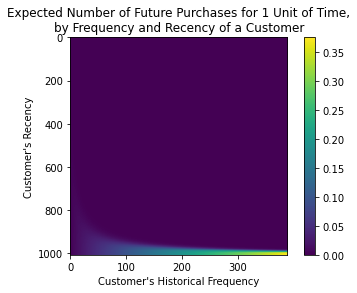

In [85]:
#Visualizing the Frequency/Recency to expected purchases
from lifetimes.plotting import plot_frequency_recency_matrix
plot_frequency_recency_matrix(bgf1)

<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

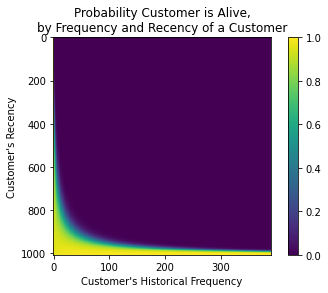

In [86]:
#Visualizing the Frequency/Recency to expected probability alive
from lifetimes.plotting import plot_probability_alive_matrix
plot_probability_alive_matrix(bgf1)

<AxesSubplot:title={'center':'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

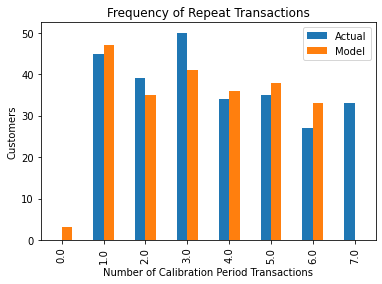

In [87]:
#Predict and actual frequency
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf1)

In [88]:
t = 100
features['predicted_purchases'] = bgf1.conditional_expected_number_of_purchases_up_to_time(t, features['frequency'], features['statis_recency'], features['customer_age'])
features.sort_values(by='predicted_purchases').tail(5)

,statis_recency,frequency,monetary,mkt_recency,monetary_avg,customer_age,CLV,spend_flag,fr_labels,sr_labels,mr_cluster,mr_labels,mn_cluster,mn_labels,rfm_scores,mkt_rfm_scores,predicted_purchases
card_number,,,,,,,,,,,,,,,,,
9.300849e+07,523.0,130,4.459990e+08,7.0,3.430762e+06,530.0,5.403160e+08,1,1,0,0,0,1,1,2,2,21.910320
9.609267e+07,521.0,127,1.675510e+08,2.0,1.319299e+06,523.0,2.166980e+08,1,1,0,0,0,0,0,1,1,22.012904
9.286801e+07,553.0,158,5.019630e+08,3.0,3.176981e+06,556.0,5.284370e+08,1,1,0,0,0,1,1,2,2,25.781671
9.702923e+09,290.0,120,2.618310e+08,1.0,2.181925e+06,291.0,2.896600e+08,1,1,2,0,0,1,1,4,2,34.671178
9.800746e+07,524.0,389,1.155512e+09,0.0,2.970468e+06,524.0,1.381332e+09,1,1,0,0,0,1,1,2,2,66.731002


In [89]:
features["probality_alive"] = bgf1.conditional_probability_alive(features['frequency'], features['statis_recency'], features['customer_age'])

In [90]:
features

,statis_recency,frequency,monetary,mkt_recency,monetary_avg,customer_age,CLV,spend_flag,fr_labels,sr_labels,mr_cluster,mr_labels,mn_cluster,mn_labels,rfm_scores,mkt_rfm_scores,predicted_purchases,probality_alive
card_number,,,,,,,,,,,,,,,,,,
9.000581e+07,442.0,8,16693000.0,2.0,2.086625e+06,444.0,28740000.0,1,0,0,0,0,0,0,0,0,2.016141,0.969564
9.000934e+07,292.0,22,78021000.0,247.0,3.546409e+06,539.0,84742000.0,1,0,2,1,1,0,0,2,1,0.000251,0.000061
9.002193e+07,514.0,36,69822000.0,13.0,1.939500e+06,527.0,107897000.0,1,0,0,0,0,0,0,0,0,6.358827,0.969484
9.002426e+07,472.0,28,132220000.0,0.0,4.722143e+06,472.0,150697000.0,1,0,0,0,0,0,0,0,0,5.654101,0.984909
9.002524e+07,421.0,13,15045000.0,16.0,1.157308e+06,437.0,19843000.0,1,0,0,0,0,0,0,0,0,3.000993,0.960524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.150176e+11,189.0,13,37701000.0,235.0,2.900077e+06,424.0,43699000.0,1,0,2,1,1,0,0,2,1,0.002169,0.000676
1.168181e+11,84.0,4,10943000.0,350.0,2.735750e+06,434.0,14589000.0,1,0,3,1,1,0,0,3,1,0.006138,0.004720
1.800071e+11,239.0,2,6832000.0,21.0,3.416000e+06,260.0,31957000.0,1,0,2,0,0,0,0,2,0,1.321147,0.945259


##### Gamma Gamma Model

Predict the future monetary of customer

In [91]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(features['frequency'],
features['monetary_avg'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 918 subjects, p: 2.57, q: 3.65, v: 2909514.34>


In [92]:
features["predicted_monetary"] = ggf.conditional_expected_average_profit(features['frequency'],features['monetary_avg'])

In [93]:
#Calculate CLV from 2 predicted value
features["Probality_CLV"] = features["predicted_purchases"] * features["predicted_monetary"]

#### Regressor

##### XGB

In [94]:
from xgboost import XGBClassifier, XGBRegressor

In [95]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [96]:
#Split dataset into train and target
X = features[["statis_recency", "frequency", "monetary", "mkt_recency", "monetary_avg", "customer_age"]]

In [97]:
y = features["CLV"]

In [98]:
#Create model and choose parameter by GridSearchCV
xgb_reg_spec = XGBRegressor(objective="reg:squarederror", randomstate = 123)
xgb_reg_model = GridSearchCV(estimator = xgb_reg_spec, param_grid = dict(learning_rate = [0.01, 0.1, 0.3, 0.5]),scoring ="neg_mean_absolute_error", refit = True, cv = 5)

In [99]:
xgb_reg_model.fit(X, y)

[01:06:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "randomstate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:06:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "randomstate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:06:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "randomstate" } might not be used.

  This c

[01:06:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "randomstate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [100]:
features['xgb_CLV'] = xgb_reg_model.predict(X)

In [101]:
(features["xgb_CLV"] - features["CLV"]).abs().mean()

997558.1669049565

In [102]:
(features["xgb_CLV"] - features["CLV"]).min()

-7008456.0

In [103]:
(features["xgb_CLV"] - features["CLV"]).max()

4915568.0

##### Random forest

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
model_rg = RandomForestRegressor(n_estimators = 30, random_state = 30)

In [107]:
rf = model_rg.fit(X_train, y_train)

In [108]:
rf.score(X_train, y_train)

0.9865337906293096

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [110]:
y_pred = rf.predict(X_train)

### Section 4: Results

In [111]:
print("MAE: %.2f"%mean_absolute_error(y_train, y_pred))

MAE: 5285756.15


In [112]:
print("MSE: %.2f"%mean_squared_error(y_train, y_pred))

MSE: 204147861113352.19


In [113]:
print("EVS: %.2f"%explained_variance_score(y_train, y_pred))

EVS: 0.99


In [114]:
y_test_pred = rf.predict(X_test)

In [115]:
print("R_sq: %.2f"%r2_score(y_test, y_test_pred))

R_sq: 0.94


In [116]:
rf.score(X_test, y_test)

0.9364493436512729

In [117]:
plt.rcParams["figure.figsize"] =(20,10)

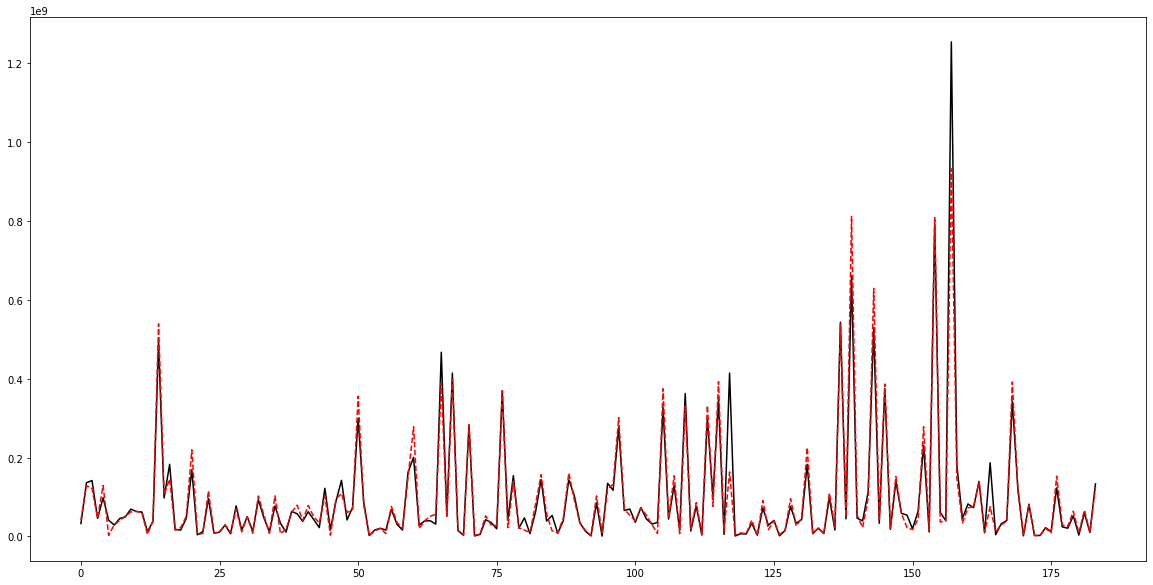

In [118]:
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label = "Observed", color = 'k', linestyle = "-")
plt.plot(x_ax, y_test_pred, label = "Predicted", color = 'red', linestyle = "--")

In [119]:
model_rg1 = RandomForestRegressor(n_estimators = 30, random_state = 30)

In [120]:
rf1 = model_rg.fit(X, y)

In [123]:
features["rf_CLV"] = rf1.predict(X)

In [124]:
cor = features.corr()

In [125]:
X.corr()

,statis_recency,frequency,monetary,mkt_recency,monetary_avg,customer_age
statis_recency,1.000000,0.511329,0.408237,-0.850578,0.067523,0.593354
frequency,0.511329,1.000000,0.808667,-0.447637,0.092047,0.283941
monetary,0.408237,0.808667,1.000000,-0.355717,0.454888,0.229248
mkt_recency,-0.850578,-0.447637,-0.355717,1.000000,-0.018264,-0.081416
monetary_avg,0.067523,0.092047,0.454888,-0.018264,1.000000,0.100024
customer_age,0.593354,0.283941,0.229248,-0.081416,0.100024,1.000000


In [126]:
features

,statis_recency,frequency,monetary,mkt_recency,monetary_avg,customer_age,CLV,spend_flag,fr_labels,sr_labels,...,mn_cluster,mn_labels,rfm_scores,mkt_rfm_scores,predicted_purchases,probality_alive,predicted_monetary,Probality_CLV,xgb_CLV,rf_CLV
card_number,,,,,,,,,,,,,,,,,,,,,
9.000581e+07,442.0,8,16693000.0,2.0,2.086625e+06,444.0,28740000.0,1,0,0,...,0,0,0,0,2.016141,0.969564,2.170517e+06,4.376070e+06,2.648977e+07,2.792733e+07
9.000934e+07,292.0,22,78021000.0,247.0,3.546409e+06,539.0,84742000.0,1,0,2,...,0,0,2,1,0.000251,0.000061,3.513942e+06,8.805485e+02,8.465156e+07,8.929073e+07
9.002193e+07,514.0,36,69822000.0,13.0,1.939500e+06,527.0,107897000.0,1,0,0,...,0,0,0,0,6.358827,0.969484,1.964057e+06,1.248910e+07,1.052012e+08,1.038839e+08
9.002426e+07,472.0,28,132220000.0,0.0,4.722143e+06,472.0,150697000.0,1,0,0,...,0,0,0,0,5.654101,0.984909,4.654620e+06,2.631769e+07,1.514661e+08,1.545902e+08
9.002524e+07,421.0,13,15045000.0,16.0,1.157308e+06,437.0,19843000.0,1,0,0,...,0,0,0,0,3.000993,0.960524,1.279608e+06,3.840094e+06,2.000010e+07,2.059067e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.150176e+11,189.0,13,37701000.0,235.0,2.900077e+06,424.0,43699000.0,1,0,2,...,0,0,2,1,0.002169,0.000676,2.894288e+06,6.278632e+03,4.405554e+07,5.187550e+07
1.168181e+11,84.0,4,10943000.0,350.0,2.735750e+06,434.0,14589000.0,1,0,3,...,0,0,3,1,0.006138,0.004720,2.753287e+06,1.689851e+04,1.266937e+07,1.468163e+07
1.800071e+11,239.0,2,6832000.0,21.0,3.416000e+06,260.0,31957000.0,1,0,2,...,0,0,2,0,1.321147,0.945259,3.213681e+06,4.245746e+06,3.000197e+07,2.129400e+07


In [127]:
cor

,statis_recency,frequency,monetary,mkt_recency,monetary_avg,customer_age,CLV,spend_flag,fr_labels,sr_labels,...,mn_cluster,mn_labels,rfm_scores,mkt_rfm_scores,predicted_purchases,probality_alive,predicted_monetary,Probality_CLV,xgb_CLV,rf_CLV
statis_recency,1.000000,0.511329,0.408237,-0.850578,0.067523,0.593354,0.414613,NaN,0.355568,-0.910393,...,0.253888,0.253888,-0.792941,-0.362574,0.548274,0.815972,0.063953,0.470144,0.414957,0.427180
frequency,0.511329,1.000000,0.808667,-0.447637,0.092047,0.283941,0.790033,NaN,0.734643,-0.463986,...,0.560739,0.560739,-0.144052,0.316239,0.852449,0.367952,0.098451,0.743341,0.790693,0.786071
monetary,0.408237,0.808667,1.000000,-0.355717,0.454888,0.229248,0.983422,NaN,0.586390,-0.379270,...,0.807384,0.807384,-0.040568,0.406584,0.669327,0.289260,0.507029,0.856091,0.984198,0.988297
mkt_recency,-0.850578,-0.447637,-0.355717,1.000000,-0.018264,-0.081416,-0.370664,NaN,-0.316215,0.867499,...,-0.230610,-0.230610,0.764735,0.500160,-0.605966,-0.916386,-0.024902,-0.498042,-0.370974,-0.379825
monetary_avg,0.067523,0.092047,0.454888,-0.018264,1.000000,0.100024,0.448603,NaN,0.050444,-0.072413,...,0.398452,0.398452,0.031382,0.170433,0.066314,0.045421,0.985330,0.347931,0.448964,0.465699
customer_age,0.593354,0.283941,0.229248,-0.081416,0.100024,1.000000,0.218453,NaN,0.189889,-0.397613,...,0.128207,0.128207,-0.332303,0.078406,0.111604,0.143815,0.083096,0.128722,0.218631,0.228250
CLV,0.414613,0.790033,0.983422,-0.370664,0.448603,0.218453,1.000000,NaN,0.589712,-0.387442,...,0.786572,0.786572,-0.053025,0.383880,0.667880,0.309936,0.500234,0.857277,0.999942,0.994430
spend_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fr_labels,0.355568,0.734643,0.586390,-0.316215,0.050444,0.189889,0.589712,NaN,1.000000,-0.309879,...,0.494050,0.494050,0.078569,0.517025,0.637090,0.282856,0.054586,0.556499,0.590232,0.603023
sr_labels,-0.910393,-0.463986,-0.379270,0.867499,-0.072413,-0.397613,-0.387442,NaN,-0.309879,1.000000,...,-0.237254,-0.237254,0.903955,0.442096,-0.557661,-0.855485,-0.071782,-0.474281,-0.387792,-0.398323


In [128]:
import plydata.cat_tools as cat

In [129]:
features[["monetary", "monetary_avg", "CLV", "Probality_CLV", "rf_CLV", "xgb_CLV"]]

,monetary,monetary_avg,CLV,Probality_CLV,rf_CLV,xgb_CLV
card_number,,,,,,
9.000581e+07,16693000.0,2.086625e+06,28740000.0,4.376070e+06,2.792733e+07,2.648977e+07
9.000934e+07,78021000.0,3.546409e+06,84742000.0,8.805485e+02,8.929073e+07,8.465156e+07
9.002193e+07,69822000.0,1.939500e+06,107897000.0,1.248910e+07,1.038839e+08,1.052012e+08
9.002426e+07,132220000.0,4.722143e+06,150697000.0,2.631769e+07,1.545902e+08,1.514661e+08
9.002524e+07,15045000.0,1.157308e+06,19843000.0,3.840094e+06,2.059067e+07,2.000010e+07
...,...,...,...,...,...,...
1.150176e+11,37701000.0,2.900077e+06,43699000.0,6.278632e+03,5.187550e+07,4.405554e+07
1.168181e+11,10943000.0,2.735750e+06,14589000.0,1.689851e+04,1.468163e+07,1.266937e+07
1.800071e+11,6832000.0,3.416000e+06,31957000.0,4.245746e+06,2.129400e+07,3.000197e+07


In [130]:
(features["Probality_CLV"] - features["CLV"]).describe()

count    9.180000e+02
mean    -7.832549e+07
std      1.157296e+08
min     -1.245118e+09
25%     -8.982849e+07
50%     -4.084250e+07
75%     -1.584355e+07
max      1.558541e+07
dtype: float64

In [131]:
(features["rf_CLV"] - features["CLV"]).describe()

count    9.180000e+02
mean    -2.028004e+05
std      1.445583e+07
min     -2.680327e+08
25%     -1.536800e+06
50%      6.400667e+05
75%      2.917167e+06
max      6.401353e+07
dtype: float64

In [132]:
(features["xgb_CLV"] - features["CLV"]).describe()

count    9.180000e+02
mean    -6.382493e+03
std      1.394655e+06
min     -7.008456e+06
25%     -5.930180e+05
50%      1.166265e+05
75%      7.212540e+05
max      4.915568e+06
dtype: float64

### Section 5: Conclusion

In summary, segmentation of the target audience is the problem I need to solve, and I solve it with CLV index and RFM model, then use probabilistic model and regressor to predict the CLV. The results show that Regressor gives better prediction results but Probability also gives different values.
To improve this prediction, I would also try to subdivide customer groups by characteristics (cohort model) to see if the groups have a common CLV range or have common characteristics to predict CLV.